# Dense neural network

Le DNN est un réseau de neurones complètement connectés : un neurone d'une couche est connecté à toutes les autres neurones de la couche adjacente.
- initialisation

Puis itérations de :
- forward propagation
- back propagation
- mise a jour des paramètres

Epoch : un epoch signifie que tout le dataset est passé à l'intérieur du réseau.
Batch size : nombre de données qui passent avant mis à jour des paramètres

## Application 1 : Wine quality

### Mise en place

In [1]:
import numpy as np
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import pandas as pd
import os,sys
from sklearn.model_selection import train_test_split

In [4]:
data_path = "dataset/winequality/winequality-red.csv"
data = pd.read_csv(data_path, sep=';')

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
print('Missing Data :', data.isna().sum().sum(), 'Shape is : ', data.shape)

Missing Data : 0 Shape is :  (1599, 12)


La variable cible est 'quality'.

### Préparation des données

In [7]:
X = data.drop('quality', axis=1)
y = data['quality']

In [8]:
# Normalisation min-max (x-xmin)/(xmax-xmin)
Xmin = X.min()
Xmax = X.max()
X_n = (X-X.min())/(Xmax-Xmin)
X_n = np.array(X_n)
y = np.array(y)

In [9]:
# Normalisation centrée réduite
Xmean = X.mean()
Xstd = X.std()
X_n = (X-Xmean)/Xstd
X_n = np.array(X_n)
y = np.array(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.2, random_state=42)
print('X_train : ', X_train.shape, 'y_train : ', y_train.shape)
print('X_test : ', X_test.shape, 'y_test : ', y_test.shape)

X_train :  (1279, 11) y_train :  (1279,)
X_test :  (320, 11) y_test :  (320,)


In [11]:
X_train.shape

(1279, 11)

### Définition du Modèle

In [12]:
def get_model_v1(shape):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape, name='InputLayer'))
    model.add(keras.layers.Dense(64, activation='relu', name='Dense_n1'))
    model.add(keras.layers.Dense(64, activation='relu', name='Dense_n2'))
    model.add(keras.layers.Dense(1, name='Output'))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae', 'mse'])
    return model

### Entrainement du modèle

In [13]:
model = get_model_v1((X_train.shape[1],))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Dense_n1 (Dense)                     │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_n2 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
os.makedirs('./models', mode=0o750, exist_ok = True)
save_dir = './models/wine_best_model.keras'

savemodel_callback = keras.callbacks.ModelCheckpoint(filepath=save_dir, verbose = 0, save_best_only = True)

In [15]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 10, validation_data = (X_test, y_test), callbacks = [savemodel_callback])

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 19.2679 - mae: 3.9476 - mse: 19.2679 - val_loss: 2.3553 - val_mae: 1.1956 - val_mse: 2.3553
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 2.1202 - mae: 1.1444 - mse: 2.1202 - val_loss: 1.3254 - val_mae: 0.9071 - val_mse: 1.3254
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 1.2851 - mae: 0.8899 - mse: 1.2851 - val_loss: 0.8804 - val_mae: 0.7427 - val_mse: 0.8804
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.8822 - mae: 0.7242 - mse: 0.8822 - val_loss: 0.6711 - val_mae: 0.6582 - val_mse: 0.6711
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.6809 - mae: 0.6218 - mse: 0.6809 - val_loss: 0.6435 - val_mae: 0.6477 - val_mse: 0.6435
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 0.5705 - mae: 0.5896 - mse: 0.5705 - val_loss: 0.6203 - val_mae: 0.6352 - val_mse: 0.6203
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.5237 - mae: 0.556

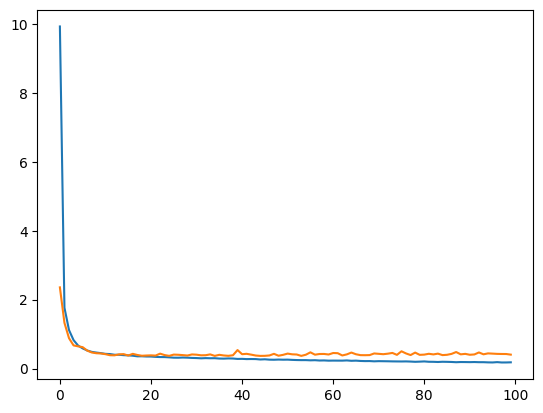

In [16]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

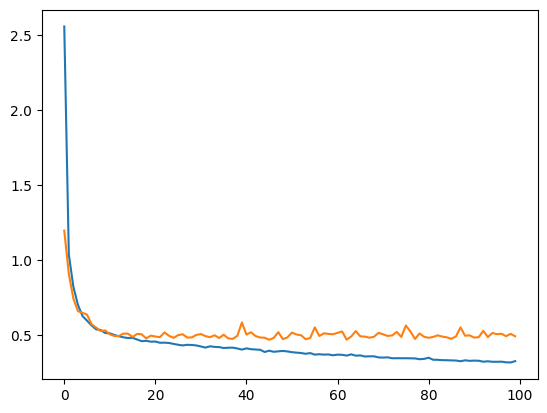

In [17]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])

## Application 2 : MNIST

Chargement du dataset à partir de keras

On utilise un DNN avec autant de neurones de sorties que de classes (9). La dernière fonction d'activation est une softmax qui permet d'avoir une probabilité.

On utilise ensuite une fonction argmax qui permet d'avoir le numéro de la classe avec la plus haute proba.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


### Normalisation

Ici on utilise la minmax


In [4]:
print(x_train.min(), x_train.max())
xmax = x_train.max()
x_train_n = x_train/xmax
x_test_n = x_test/xmax
print(x_train_n.min(), x_train_n.max())

0 255
0.0 1.0


### Créer le modèle

In [5]:
def get_model_v2(shape):
    hidden1 = 100
    hidden2 = 100
    model = keras.models.Sequential([
        keras.layers.Input(shape, name='InputLayer'),
        keras.layers.Flatten(),
        keras.layers.Dense(hidden1, activation='relu', name='Dense_n1'),
        keras.layers.Dense(hidden2, activation='relu', name='Dense_n2'),
        keras.layers.Dense(10, activation= 'softmax', name='Output')])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

In [6]:
size = (x_train.shape[1], x_train.shape[2])
model = get_model_v2(size)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_n1 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_n2 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

### Entrainer le modèle

Callback: définir une condition d'arret et de sauvegarde du modèle. 

ModelCheckpoint enregistre le modèle selon les conditions spécifiée.
Ici on souhaite l'enregistrer à chaque fois qu'on obtiens une accuracy sur les données de validation supérieure à toutes les précédentes.
On fixe un threshold à 0.9 pour ne pas tout enregistrer.

EarlyStopping permet d'arrêter le training quand les conditions sont atteintes. Ici on donne comme condition l'amélioration de l'accuracy sur
les données de validation. Patience spécifie le nombre d'Epoch sans amélioration qu'on attend avant d'arrêter le training. Si nécessaire, on peut
utiliser "min_delta = float" pour spécifier le changement minimum considéré comme une amélioration.
On indique commencer à monitorer pour un EarlyStopping à partir de l'epoch 5, et aussi qu'en cas d'arrêt, il faudra restaurer les dernier meilleurs poids.

In [7]:
savemodel_callback = [keras.callbacks.ModelCheckpoint(filepath="models/mnistDNN_{epoch:02d}-{val_accuracy:.3f}.keras", monitor = 'val_accuracy',
                                                      save_best_only = True, mode = 'max', initial_value_threshold = 0.9),
                      keras.callbacks.EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience=5, start_from_epoch = 5, 
                                                   restore_best_weights = True)]

In [15]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 256, validation_data = (x_test, y_test), callbacks = savemodel_callback)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9918 - loss: 0.0262 - val_accuracy: 0.9761 - val_loss: 0.1386
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9965 - loss: 0.0107 - val_accuracy: 0.9773 - val_loss: 0.1461
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9972 - loss: 0.0096 - val_accuracy: 0.9778 - val_loss: 0.1455
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9982 - loss: 0.0056 - val_accuracy: 0.9784 - val_loss: 0.1464
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9984 - loss: 0.0054 - val_accuracy: 0.9779 - val_loss: 0.1555
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9989 - loss: 0.0039 - val_accuracy: 0.9763 - val_loss: 0.1662
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9985 - loss: 0.0050 - val_accuracy: 0.9781 - val_loss: 0.1680
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9992 - loss: 0.0031 - val_acc

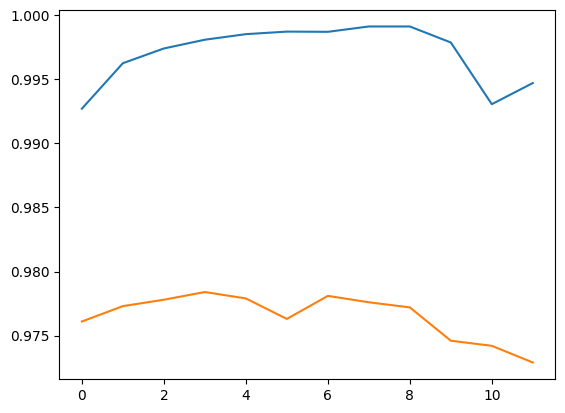

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

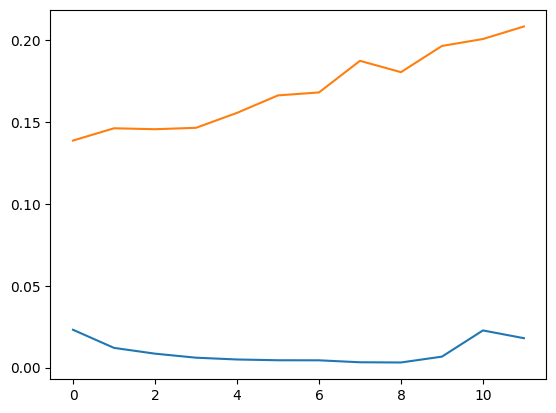

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])